# Salary Prediciton based on Years of Experience

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression_from_scratch import LinearRegression

## Data Preprocessing

In [2]:
# Import dataset
dataset = pd.read_csv("../datasets/salary_data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# Extract features and targets
X = np.array(dataset.YearsExperience).reshape(-1, 1)
Y = np.array(dataset.Salary)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [7]:
# Train Linear Regression model
model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X_train, Y_train)

print("Optimized W: ", round(model.W[0], 2))
print("Optimized b: ", round(model.b, 2))

Optimized W:  25511.63
Optimized b:  71057.33


## Evaluation

In [8]:
# Predictions on test set
Y_pred = model.predict(X_test)

# Compute performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2-Score: {r2:.2f}")

Model Performance:
Mean Squared Error (MSE): 37784662.95
R2-Score: 0.94


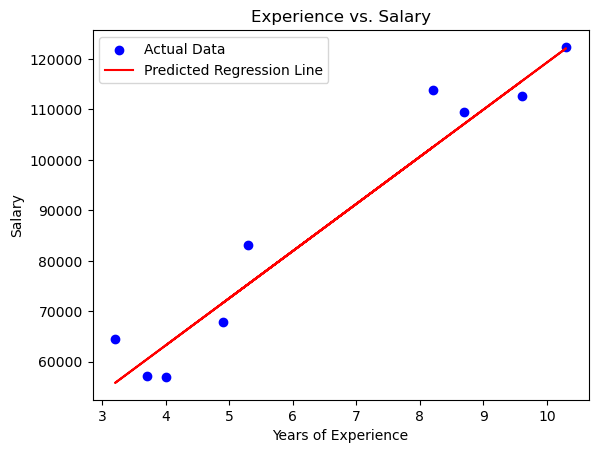

In [9]:
# Visualization test set predictions
plt.scatter(scaler.inverse_transform(X_test), Y_test, color='blue', label='Actual Data')
plt.plot(scaler.inverse_transform(X_test), Y_pred, color='red', label='Predicted Regression Line')
plt.title('Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()